In [1]:
"""
This notebook takes in a csv file, and creates a topic model using LDA.
"""

'\nThis notebook takes in a csv file, and creates a topic model using LDA.\n'

In [2]:
# create an NMF topic model of csv data using sklearn and numpy libraries and plot the topics over time using matplotlib and seaborn libraries (optional)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis #(2.1.2)

from __future__ import print_function
from googleapiclient.discovery import build
from httplib2 import Http
from oauth2client import file, client, tools
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [3]:
#Load in dataset
df = pd.read_csv('ADD FILE HERE', encoding='ISO-8859-1')

/var/folders/v8/16yc7hy13dn8gqzv70qdbg1h0000gn/T/ipykernel_17371/167976737.py:2: DtypeWarning: Columns (162,163,164,166,167,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/fiannualamorgan/Downloads/whole_data.csv', encoding='ISO-8859-1')


In [4]:
#convert all text in column 'fulltext' to lowercase
df['fulltext'] = df['fulltext'].str.lower()

(5646, 43831)
(5646, 10)
(10, 43831)
For topic 0 the words with the highest value are:
peter        761.610861
margaret     727.551146
anna         657.913154
lyn          648.099973
dulcie       458.912054
lan          377.153319
gerry        271.099967
did          260.634287
marion       248.150024
old          221.920802
jean         211.878873
lin          202.751383
said         186.917198
mother       170.628452
time         166.996678
yu           155.099989
house        151.775719
continued    147.663458
kate         143.208021
came         127.195368
love         127.048763
little       124.106540
way          121.905434
jeanne       118.838506
life         118.743630
eyes         117.993907
mrs          116.986603
peterâ       106.679987
years        105.531540
lee          104.058625
Name: 0, dtype: float64


For topic 1 the words with the highest value are:
said       11891.402174
iâ         11419.409764
like        6963.921218
youâ        6276.968602
ll          5972.2557

/Users/fiannualamorgan/anaconda3/envs/Hansard/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


For topic 0 the top 10 documents are:
4703    mystery house a romance of wartime by marykela...
2185    myste ry house aromance of wartime by mary kel...
4739    mystery house serial by mary kelaher illustrat...
4624    mystery house aromance marv kelaher serial nov...
4779    mystery house serial novel by mary kelaher ill...
5205    a serial of adventure and romance the treasure...
3788    mtster house serial novel chapter viii ( conti...
3591    final instalment the treasure of li chang by s...
1270    mystery house serial novel by mary kelaher ill...
4374    mystery house house aromance of wartime by mar...
Name: fulltext, dtype: object


For topic 1 the top 10 documents are:
5282    a romantic serial novel driftwood isle by berr...
2109    serial: romance and intrigue in a great steelw...
5290    a romantic serial novel driftwoodble by beryl ...
5330    our new romantic serial novel [?]riftwoodble b...
5365    a romantic serial novel driftwood isle illustr...
5361    a romantic ser

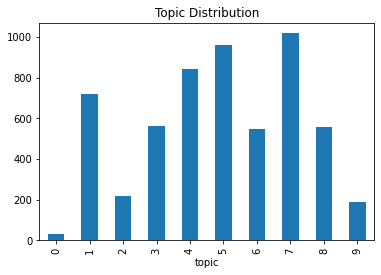

/Users/fiannualamorgan/anaconda3/envs/Hansard/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/fiannualamorgan/anaconda3/envs/Hansard/lib/python3.8/site-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \
/Users/fiannualamorgan/anaconda3/envs/Hansard/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/fiannualamorgan/anaconda3/envs/Hansard/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.sklearn

try:
    # Check for NaN values in 'fulltext' column
    if df['fulltext'].isnull().any():
        print("Warning: NaN values found in 'fulltext' column. Removing these rows...")
        df = df.dropna(subset=['fulltext'])

    # Use CountVectorizer since LDA works with raw term counts
    vect = CountVectorizer(max_df=0.8, min_df=5, stop_words='english')
    X = vect.fit_transform(df.fulltext)

    # Create an LDA instance model
    model = LatentDirichletAllocation(n_components=10, random_state=1)
    model.fit(X)

    lda_features = model.transform(X)

    print(X.shape)
    print(lda_features.shape)
    print(model.components_.shape)

    # Create a DataFrame: components_df
    components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())

    for topic in range(components_df.shape[0]):
        tmp = components_df.iloc[topic]
        print(f'For topic {topic} the words with the highest value are:')
        print(tmp.nlargest(30))
        print('\n')

    # Identify the largest topic for each document in the LDA features
    df['topic'] = lda_features.argmax(axis=1)
    # Identify probabilities of each topic for each document in the LDA features
    df['topic_weight'] = lda_features.max(axis=1)

    for topic in range(components_df.shape[0]):
        tmp = df[df['topic'] == topic]
        print(f'For topic {topic} the top 10 documents are:')
        print(tmp.sort_values(by='topic_weight', ascending=False).head(10)['fulltext'])
        print('\n')

    for topic in range(components_df.shape[0]):
        tmp = df[df['topic'] == topic]
        print(f'For topic {topic} the number of documents is:')
        print(tmp.shape[0])
        print('\n')

    tmp = df.groupby('topic').size()
    tmp.plot(kind='bar')
    plt.title('Topic Distribution')
    plt.show()

    # Visualize the topics using pyLDAvis
    pyLDAvis.enable_notebook()
    pyLDAvis.sklearn.prepare(model, X, vect)

except ValueError as e:
    print(f"An error occurred: {e}")


In [6]:
#save df as csv file
df.to_csv('/Users/fiannualamorgan/Downloads/whole_data_with topics.csv', index=False)
